In [2]:
%autosave 120

Autosaving every 120 seconds


In [3]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
path = os.getcwd()

In [5]:
itrain = pd.read_csv(str(path)+'/AV_train_wns.csv')
itest = pd.read_csv(str(path)+'/AV_test_wns.csv')

In [6]:
print(itrain.shape)
itrain.isnull().sum()

(54808, 14)


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
print(itest.shape)
itest.isnull().sum()

(23490, 13)


employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [8]:
itrain.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
itrain.apply(lambda x: (len(x.unique()), [x.unique()]))

employee_id             (54808, [[65438, 65141, 7513, 2542, 48945, 588...
department              (9, [[Sales & Marketing, Operations, Technolog...
region                  (34, [[region_7, region_22, region_19, region_...
education               (4, [[Master's & above, Bachelor's, nan, Below...
gender                                                      (2, [[f, m]])
recruitment_channel                    (3, [[sourcing, other, referred]])
no_of_trainings                   (10, [[1, 2, 3, 4, 7, 5, 6, 8, 10, 9]])
age                     (41, [[35, 30, 34, 39, 45, 31, 33, 28, 32, 49,...
previous_year_rating                (6, [[5.0, 3.0, 1.0, 4.0, nan, 2.0]])
length_of_service       (35, [[8, 4, 7, 10, 2, 5, 6, 1, 3, 16, 9, 11, ...
KPIs_met >80%                                               (2, [[1, 0]])
awards_won?                                                 (2, [[0, 1]])
avg_training_score      (61, [[49, 60, 50, 73, 85, 59, 63, 83, 54, 77,...
is_promoted                           

In [10]:
itrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
itrain.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


0    50140
1     4668
Name: is_promoted, dtype: int64

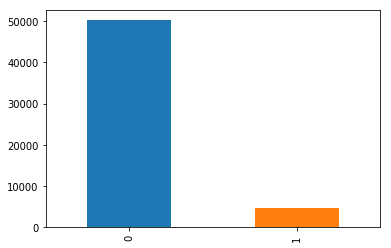

In [12]:
itrain['is_promoted'].value_counts().plot.bar()
itrain['is_promoted'].value_counts()

In [13]:
itrain['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [14]:
itrain['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [15]:
print(itrain['previous_year_rating'].median())
itest['previous_year_rating'].median()

3.0


3.0

### DATA PROCESSING

In [16]:
# Education & previous year ratings have 'nan'
def preprocess(df):
    df['education'].fillna('unknown', inplace = True)
    df['previous_year_rating'].fillna(3, inplace = True)
    return df

In [17]:
itrain_pp = preprocess(itrain)
itest_pp = preprocess(itest)

In [18]:
num_col = ['no_of_trainings', 'age', 'length_of_service' ,'avg_training_score']
cat_col = ['department','region','education', 'previous_year_rating', 'gender','KPIs_met >80%', 
          'awards_won?', 'recruitment_channel'] 
target_col = ['is_promoted']

In [19]:
#train data
num_itrain = itrain_pp[num_col]
cat_itrain = itrain_pp[cat_col]

#test data
num_itest = itest_pp[num_col]
cat_itest = itest_pp[cat_col]

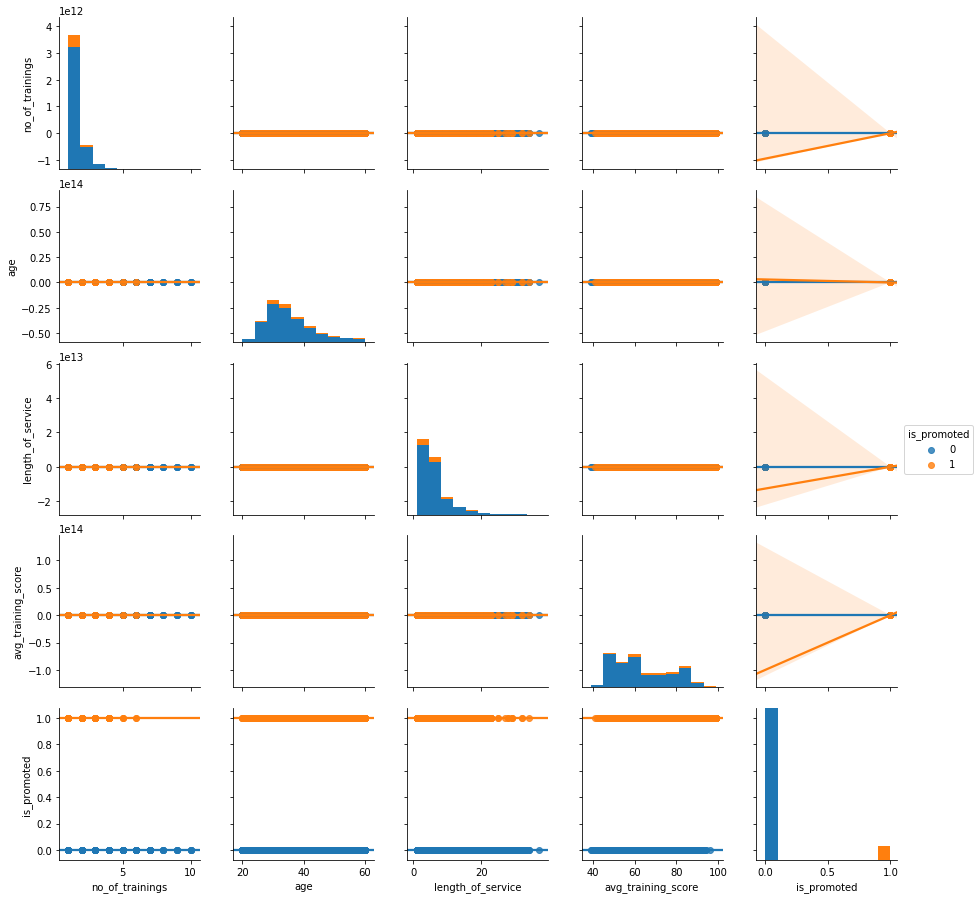

In [20]:
sns.pairplot(itrain[num_col + ['is_promoted']], hue = 'is_promoted', kind = 'reg')

In [21]:
#### Box Cox Transforms of NUM_df

# # answers_clean = answers[~np.isnan(answers)]

# from scipy import stats as spstats

# for col in num_col:
#     col_array = np.array(num_itrain[col])
#     l, opt_lambda = spstats.boxcox(col_array)
#     num_itrain[col + str('_bxcx')] = spstats.boxcox(num_itrain[col], lmbda=opt_lambda)

# num_itrain.hist(figsize = (8,8))

In [22]:
### New Interaction Features: ploynomial Features

int_df = itrain_pp[num_col]

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=False)
res = pf.fit_transform(int_df)

degree_df = pd.DataFrame(pf.powers_, columns = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score'])

col = np.arange(0,69,1)
int_feat = pd.DataFrame(data = res, columns = col)

fcol = [3,15,28,52,56]

newf = int_feat[fcol]

degree_df.iloc[fcol]

,no_of_trainings,age,length_of_service,avg_training_score
3,0,0,0,1
15,2,1,0,0
28,0,1,1,1
52,1,0,1,2
56,0,3,0,1


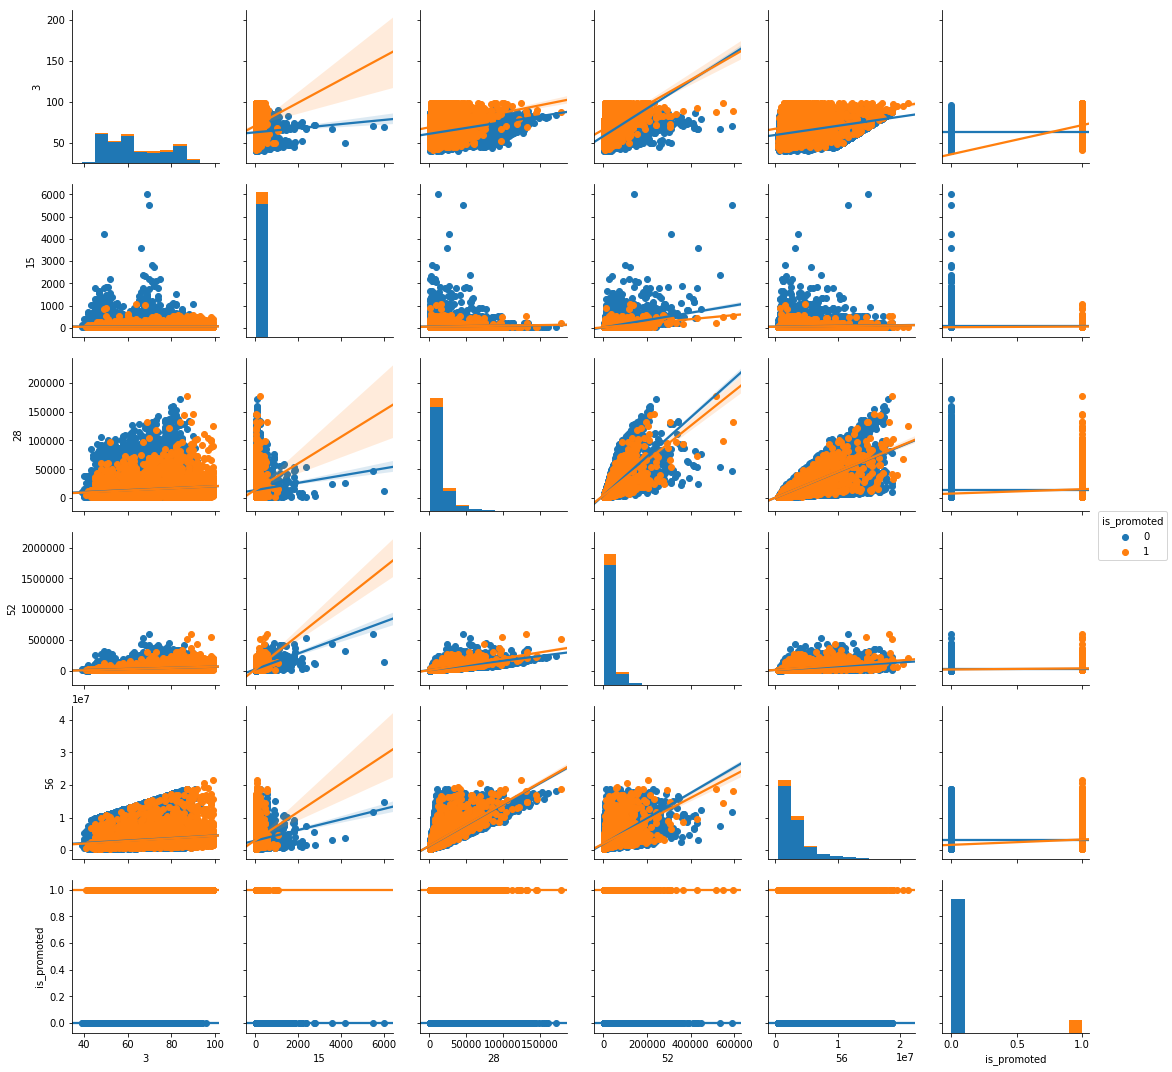

In [413]:
df = pd.concat([newf, target], axis = 1)
df.head()

sns.pairplot(df, hue='is_promoted', kind = 'reg', plot_kws={'scatter_kws': {'alpha': 1}})

In [23]:
# new_col = ['no_of_trainings_bxcx', 'age_bxcx', 'length_of_service_bxcx',
#        'avg_training_score_bxcx']

# for col in fcol:
#     itrain_dum[str('IF') + str(col)] = int_feat[col]

In [24]:
train_features = itrain_pp.drop(['is_promoted', 'employee_id'], axis = 1)
target = itrain_pp.is_promoted

In [25]:
train_features.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [26]:
test_features = itest_pp.drop('employee_id', axis = 1)

In [27]:
print(train_features.shape)
print(target.shape)
print(test_features.shape)

(54808, 12)
(54808,)
(23490, 12)


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    train_features[col] = le.fit_transform(train_features[col])

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = 'borderline2')
X_resampled, y_res = sm.fit_sample(train_features, target)

In [52]:
X_res = pd.DataFrame(data = X_resampled, columns = test_features.columns)

In [53]:
X_res.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7.0,31.0,2.0,0.0,2.0,1.0,35.0,4.0,8.0,1.0,0.0,49.0
1,4.0,14.0,0.0,1.0,0.0,1.0,30.0,4.0,4.0,0.0,0.0,60.0
2,7.0,10.0,0.0,1.0,2.0,1.0,34.0,2.0,7.0,0.0,0.0,50.0
3,7.0,15.0,0.0,1.0,0.0,2.0,39.0,0.0,10.0,0.0,0.0,50.0
4,8.0,18.0,0.0,1.0,0.0,1.0,45.0,2.0,2.0,0.0,0.0,73.0


In [54]:
for col in cat_col:
    X_res[col] = X_res[col].round()
    
X_res['is_promoted'] = y_res

X = X_res.drop_duplicates()

X_smote = X.drop(['is_promoted'], axis = 1)
y_smote = X.is_promoted

In [55]:
dummies_col = ['department','region','education', 'gender','recruitment_channel']

def getdummies(df):
    result = pd.get_dummies(df,columns = dummies_col)
    return result

train_dum = getdummies(X_smote)
test_dum = getdummies(test_features)

In [58]:
print(train_dum.shape)
test_dum.shape

(99885, 59)


(23490, 59)

In [392]:
# ## - " RECURSIVE FEATURE ELIMINATION"

# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# import xgboost as xgb

# estimator = xgb.XGBClassifier(n_estimators = 200, n_jobs = -1, class_weights = 'balanced')
# selector = RFECV(estimator, step = 1, cv=StratifiedKFold(2),
#               scoring= 'f1')
# selector = selector.fit(train_dum,y_smote)

# print("Optimal number of features : %d" % selector.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
# plt.show()

# ranks = selector.ranking_
# print(ranks)

# int_cols = []
# for index, values in np.ndenumerate(ranks):
#     if ranks[index] == 1:
#         int_cols.append(index)
        
# int_feat_indices = []
# for i in range(0,12):
#     int_feat_indices.append(int_cols[i][0])
# int_feat_indices

In [59]:
print(train_dum.shape)
test_dum.shape

(99885, 59)


(23490, 59)

### MODEL BUILDING

Text(0.5,1,'Cummlative Variance with pc')

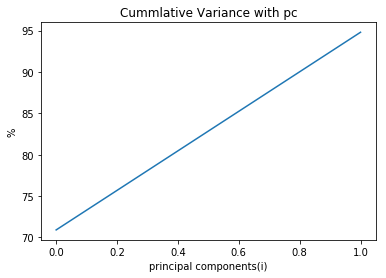

In [61]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pcs = pca.fit_transform(train_dum)
test_pc = pca.transform(test_dum)
pdf = pd.DataFrame(data = pcs)
pdf_test = pd.DataFrame(data = test_pc)


#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.xlabel('principal components(i)')
plt.ylabel('%')
plt.title('Cummlative Variance with pc')

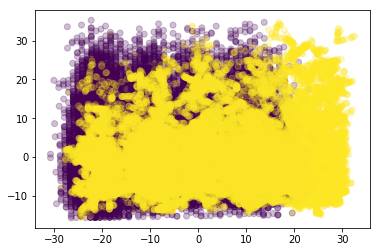

In [37]:
plt.scatter(x = pdf[0], y = pdf[1], c = y_smote, alpha = 0.25)

In [72]:
#Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(pdf)
test = sc.transform(pdf_test)

In [63]:
#importing packages from sk learn
from sklearn.model_selection import train_test_split

#FUNCTION for Train & Validation set
X_train, X_test, y_train, y_test = train_test_split(train, 
                                                    y_smote, test_size=0.3, random_state = 25)

In [64]:
from sklearn.svm import SVC
clf = SVC(class_weight = 'balanced', verbose = 20, C = 0.5)
clf = clf.fit(X_train, y_train)

[LibSVM]

In [65]:
y_pred = clf.predict(X_test)

In [66]:
 from sklearn.metrics import accuracy_score, f1_score

# f1-score on validation data
print('\n weighted f1-score on validation:', f1_score(y_test, y_pred, average='weighted'))

# validation score
from sklearn.metrics import classification_report
print('\n Clf Report on validation: \n\n', classification_report(y_test, y_pred))

# confusion matrix on validation data
from sklearn.metrics import confusion_matrix
print('\n Confusion report on validation: \n\n', confusion_matrix(y_test, y_pred))
confusion_matrix(y_test, y_pred)


 weighted f1-score on validation: 0.629492446381913

 Clf Report on validation: 

              precision    recall  f1-score   support

          0       0.66      0.54      0.60     14960
          1       0.61      0.72      0.66     15006

avg / total       0.64      0.63      0.63     29966


 Confusion report on validation: 

 [[ 8098  6862]
 [ 4148 10858]]


array([[ 8098,  6862],
       [ 4148, 10858]])

In [68]:
def BuildModel(model):
    
    # MODEL TRAINING

    clf = model.fit(X_train, y_train)
    
    #train-prediction
    y_train_pred = model.predict(X_train)
    
    #accuracy on train
    from sklearn.metrics import accuracy_score, f1_score
    accuracy = model.score(X_train, y_train)
    print('\n Accuarcy on train %:  ', accuracy * 100)
    
    # TRAINING ENDED....PREDCITON BEGINS
    
    ## PREDICTION ON VALIDATION DATA
    y_pred = clf.predict(X_test)
    
    # accuracy on validation data
    accuracy = model.score(X_test, y_test)
    print('\n Accuarcy on validation %:  ', accuracy * 100)
    
    # f1-score on validation data
    print('\n weighted f1-score on validation:', f1_score(y_test, y_pred, average='weighted'))
    
    # validation score
    from sklearn.metrics import classification_report
    print('\n Clf Report on validation: \n\n', classification_report(y_test, y_pred))
    
    # confusion matrix on validation data
    from sklearn.metrics import confusion_matrix
    print('\n Confusion report on validation: \n\n', confusion_matrix(y_test, y_pred))
    confusion_matrix(y_test, y_pred)
    
    return y_pred
    
def featureImp(model):
    features = train_features.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
   # fImp_Asc = []
    
   # for i in indices:
   #     n = features[i]
    #    fImp_Asc.append(n)
        
    plt.figure(figsize=(10,10))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importances')
    plt.show()
    
    #return fImp_Asc
    
def getROC(Classifier):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    nb_roc_auc = roc_auc_score(y_valid, Classifier.predict(X_valid))
    fpr, tpr, thresholds = roc_curve(y_valid, Classifier.predict_proba(X_valid)[:,1])
    plt.figure(figsize = (4,4))
    plt.plot(fpr, tpr, label='(area = %0.2f)' % nb_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



 Accuarcy on train %:   68.95264520373576


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



 Accuarcy on validation %:   67.39638256690917

 weighted f1-score on validation: 0.6727232467044447

 Clf Report on validation: 

              precision    recall  f1-score   support

          0       0.70      0.61      0.65     14960
          1       0.66      0.74      0.69     15006

avg / total       0.68      0.67      0.67     29966


 Confusion report on validation: 

 [[ 9164  5796]
 [ 3974 11032]]


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


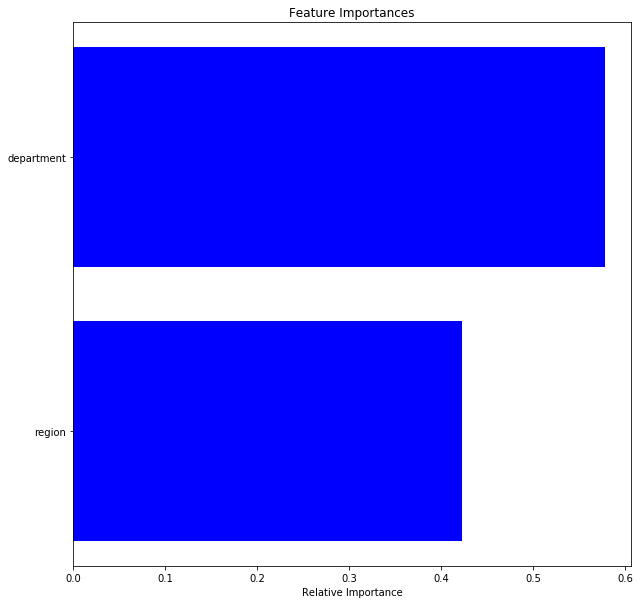

In [69]:
#Gradient Boosting Machines
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
xgb = xgb.XGBClassifier(n_estimators = 500, class_weight = 'balanced') 
# n_estimators = 50 (default) # base_estimator = DecisionTreeClassifier(default)
xgb_pred = BuildModel(xgb)
featureImp(xgb)

### Final Predictions for Submission

In [117]:
itest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [73]:
### Submission 1: Base model: GBC
## Sub 02: GBC, n = 5000 
# import xgboost as xgb

fmodel = GradientBoostingClassifier(n_estimators = 1000)
fmodel = fmodel.fit(train, y_smote)
gbc_predictions = fmodel.predict(test)

isubmission = itest[['employee_id']]
isubmission['is_promoted'] = gbc_predictions

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [321]:
isubmission.to_csv('06sub_gbcSMOTE_AVwns.csv', index = False)

In [74]:
isubmission['is_promoted'].value_counts()

0    15284
1     8206
Name: is_promoted, dtype: int64